In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from keras.utils.np_utils import to_categorical

train_df = pd.read_csv('/kaggle/input/fashion-mnist/fashion-mnist_train.csv')
#train_df.head()
y = train_df['label']
x = train_df.drop(['label'], axis=1, inplace=False)
x = np.array(x)
x = (x/255).astype('float32')
y = to_categorical(y)
x.shape

(60000, 784)

In [5]:
from sklearn.model_selection import train_test_split
import time

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)
y_train.shape

(51000, 10)

In [6]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def error(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples

def cross_entropy(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss

class MyNN:
    def __init__(self, x, y):
        self.x = x
        neurons = 256
        self.lr = 0.05
        ip_dim = x.shape[1]
        op_dim = y.shape[1]

        self.w1 = np.random.randn(ip_dim, neurons)
        self.b1 = np.zeros((1, neurons))
        self.w2 = np.random.randn(neurons, neurons)
        self.b2 = np.zeros((1, neurons))
        self.w3 = np.random.randn(neurons, op_dim)
        self.b3 = np.zeros((1, op_dim))
        self.y = y

    def feedforward(self):
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(z2)
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = softmax(z3)
        
    def backprop(self):
        loss = cross_entropy(self.a3, self.y)
        print('Error :', loss)
        
        a3_delta = error(self.a3, self.y) # w3
        z2_delta = np.dot(a3_delta, self.w3.T)
        a2_delta = z2_delta * sigmoid_derv(self.a2) # w2
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * sigmoid_derv(self.a1) # w1

        self.w3 -= self.lr * np.dot(self.a2.T, a3_delta)
        self.b3 -= self.lr * np.sum(a3_delta, axis=0, keepdims=True)
        self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 -= self.lr * np.sum(a2_delta, axis=0)
        self.w1 -= self.lr * np.dot(self.x.T, a1_delta)
        self.b1 -= self.lr * np.sum(a1_delta, axis=0)

    def predict(self, data):
        self.x = data
        self.feedforward()
        return self.a3.argmax()


In [7]:
model = MyNN(x_train, np.array(y_train))

epochs = 100
for x in range(epochs):
    print('Epoch {}'.format(x+1))
    model.feedforward()
    model.backprop()

def get_acc(x, y):
    acc = 0
    for xx,yy in zip(x, y):
        s = model.predict(xx)
        if s == np.argmax(yy):
            acc +=1
    return acc/len(x)*100

print("Training accuracy : ", get_acc(x_train, np.array(y_train)))
print("Test accuracy : ", get_acc(x_val, np.array(y_val)))

Epoch 1
Error : 24.642998082177066
Epoch 2
Error : 18.576191077132076
Epoch 3
Error : 15.120470131865693
Epoch 4
Error : 13.137576878114649
Epoch 5
Error : 11.625923014523671
Epoch 6
Error : 10.470595897224891
Epoch 7
Error : 9.57774779932001
Epoch 8
Error : 8.870323045075901
Epoch 9
Error : 8.2872328848622
Epoch 10
Error : 7.78353272188816
Epoch 11
Error : 7.337011022585505
Epoch 12
Error : 6.9394640719398595
Epoch 13
Error : 6.586254392063166
Epoch 14
Error : 6.272286126034111
Epoch 15
Error : 5.9927185389226345
Epoch 16
Error : 5.743861715971187
Epoch 17
Error : 5.522617024147778
Epoch 18
Error : 5.325575988420639
Epoch 19
Error : 5.148924751903899
Epoch 20
Error : 4.988931267002415
Epoch 21
Error : 4.8424076864880155
Epoch 22
Error : 4.706881789309041
Epoch 23
Error : 4.5805300020363084
Epoch 24
Error : 4.4620300163689555
Epoch 25
Error : 4.350428376912878
Epoch 26
Error : 4.245040829777228
Epoch 27
Error : 4.145371733432895
Epoch 28
Error : 4.051047397615545
Epoch 29
Error : 3.961

In [8]:
test_df = pd.read_csv('/kaggle/input/fashion-mnist/fashion-mnist_test.csv')
# test_df.head()
test_df = test_df.drop(['label'], axis=1, inplace=False)

In [9]:
test_df = np.array(test_df)/255.0
test_df.shape

(10000, 784)

In [10]:
preds = []
for img in test_df:
    preds.append(model.predict(img))

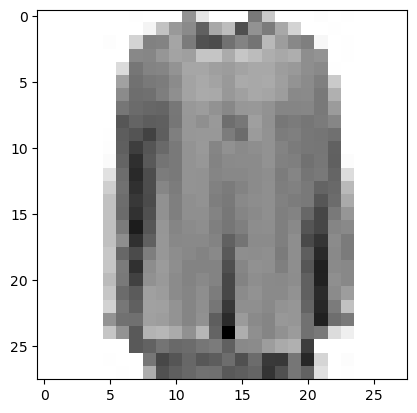

In [11]:
import matplotlib.pyplot as plt

plt.imshow(test_df[7].reshape(28, 28), cmap='binary')